## 项目信息
在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。


## 调查问题
作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

我们的自变量是什么？因变量是什么？

此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。


现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

首先对数据进行观察。

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
#save data as data frame
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [123]:
#find the information of data frame and clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [124]:
df.duplicated().sum()

0

In [125]:
df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

## 任务
我们在这里的任务是对两个实验组的反应时间进行研究，一组是文字内容与文字颜色一致时的实验组，另一组是文字内容与文字颜色不一致的实验组，观察对照两个实验组中受测试者观察得到正确颜色的反应时间的结果并判断他们是否一致。也就是对Congruent组和Incongruent组的平均反应时间并进行对比，分析两组实验结果是否有差别并推测结论。

我们这里的自变量是Congruent和Incongruent两组实验中文字与颜色的展现形式（文字内容与文字颜色是否一致），因变量是两组实验中观察者得到正确结果所消耗的时间。
## 假设
可以看到数据干净，不需清洗。可以直接开始统计分析。

首先设定条件假设。

#### 零假设：文字内容与颜色一致时被测验者得出正确颜色的反应时间，与文字内容与颜色不一致时被测试者的分辨出颜色的反应时间相同。

#### 备择假设：  文字内容与颜色一致时被测验者得出正确颜色的反应时间，与文字内容与颜色不一致时被测试者分辨出颜色的反应时间不同。
 
#### 这里我们用 **$H_{0}$** 表示零假设，**$H_{1}$** 表示备择假设，Congruent表示文字与颜色一致的实验组，Incongruent表示文字内容与颜色不一致的实验组，**$p_{congruent}$** 表示Congruent实验组的总体平均反应时间，**$P_{incongruent}$** 表示Incongruent实验组的总体平均反应时间。

 **$H_{0}$** :  **$p_{congruent}$** = **$P_{incogruent}$**
 
 **$H_{1}$** :  **$P_{congruent}$** ≠ **$P_{incongruent}$**

In [126]:
#Use statistics to describe data
#The mean of data
df['Congruent'].mean() , df['Incongruent'].mean()

(14.051125000000004, 22.01591666666667)

In [127]:
#The median of data
df['Congruent'].median() , df['Incongruent'].median()

(14.3565, 21.0175)

In [153]:
#The standart deviation of data
np.var(df['Congruent']) , np.var(df['Incongruent']) 

(12.141152859375, 22.05293382638889)

In [150]:
#The std of data
data1 = df['Congruent'].values
data2 = df['Incongruent'].values
std1 = np.sqrt(((data1 - np.mean(data1)) ** 2).sum() / (data1.size - 1))
std2 = np.sqrt(((data2 - np.mean(data2)) ** 2).sum() / (data1.size - 1))
std1,std2

(3.5593579576451955, 4.797057122469138)

In [129]:
df['Congruent'].max() , df['Incongruent'].max() , df['Congruent'].min() , df['Incongruent'].min()

(22.328000000000003, 35.255, 8.63, 15.687000000000001)

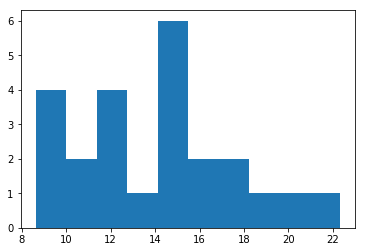

In [130]:
%matplotlib inline
plt.hist(df['Congruent'])
plt.show()

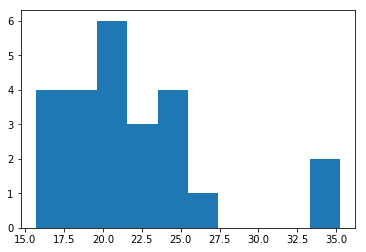

In [131]:
plt.hist(df['Incongruent'])
plt.show()

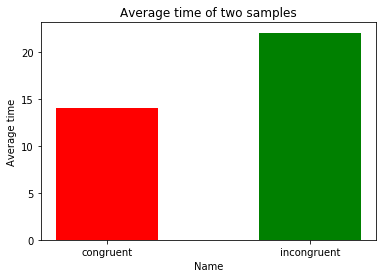

In [132]:
value_list = [df['Congruent'].mean() , df['Incongruent'].mean()]
name_list = ['congruent' , 'incongruent']
plt.bar(name_list , value_list , width = 0.5 , color = 'rgb')
plt.xlabel('Name')
plt.ylabel('Average time')
plt.title('Average time of two samples')
plt.show()

#### 从前两个图和计算结果来看，congruent和incongruent的平均时间分别为14.05，22.01，用时中位数分别为14.3565 ，21.0175，标准差为3.559和4.797。两次测试的统计结果都呈现出明显的右偏态，incongruent中有两个数据呈现特异，数值为35，距离分布中心远，应为异常值。

#### 现在开始进行统计测试。我们这里的任务是检测两组数据是否存在显著差异，并且需要确定两组之间的差异是否明显大于组内的差异。根据实验中所研究的是两组样本来自同一组人，且为同一组人在不同影响条件下获得的两组样本值（总的均值与标准偏差未知，样本总量小于30），因此我们在这里采用配对双样本t检验。

#### 由于备择假设为文字内容与颜色一致时与文字内容与颜色不一致时的平均反应时间不一样，也就是 **$H_{1}$** :  **$P_{congruent}$** ≠ **$P_{incongruent}$** ，所以这里采用双尾检验。

限定显著水平α = 5% ， 也就是置信水平为95%

假设两组样本容量分别为n = 24，那么自由度为n - 1 = 23。

In [137]:
#calculate degrees of freedom
n1 = df['Congruent'].count()
n2 = df['Incongruent'].count()
n = (n1 + n2 - 2)/2
n

23.0

In [134]:
#calculate the mean and std of the sample difference
from scipy import stats
df['difference'] = df['Incongruent'] - df['Congruent']
diff_mean = df['difference'].mean()
diff_std = np.std(df['difference'] , ddof = 1)
diff_mean , diff_std

(7.964791666666667, 4.864826910359056)

In [135]:
#Calculate the T-test on TWO RELATED samples
stats.ttest_rel(df['Congruent'] , df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

#### 结论：这里的测试为显著性水平α = 5% ， 自由度为23的双侧t检验，根据检验结果与t-test表对比可知，t分数临界值约为2.069，而测试结果是8.0207，说明两个实验组之间具有大于组内的显著性差异。

根据测试结果可以看到p值小于限定的显著性水平α = 5%，表示两组样本存在显著差异，因此在这里选择备择假设，也就是文字内容与文字颜色一致时，与文字内容与文字颜色不一致时，人们判断文字颜色的反应时间不同。